### Q1.How many patients were registered in each unique occupation?


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Hospitalization_Discharge=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=0)
CardiacComplications=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=1)
Responsivenes=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=2)
PatientHistory=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=3)
Labs=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=4)
Demography=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=5)
Patient_Prescriptions=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=6)

In [18]:
# Reading the Demography sheet of an excel file

# dropping null value columns to avoid errors 
Demography.dropna(inplace = False) 
  
patient_count =  Demography.groupby('occupation').count()
print('Patients registered in each occupation :',patient_count)



Patients registered in each occupation :                inpatient_number  gender  weight  height   BMI  ageCat
occupation                                                           
Officer                       7       7       7       7     7       7
Others                       89      89      89      89    89      89
UrbanResident              1670    1670    1670    1670  1670    1670
farmer                      198     198     198     198   198     198
worker                       17      17      17      17    17      17


### Q2.Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

In [20]:
# subsetting the data using position
severe=(Responsivenes.loc[Responsivenes['GCS'].isin([3,4,5,6,7,])])
severe
severe_count = len(severe)
severe_count

#Getting the count for number of patients
moderate=(Responsivenes.loc[Responsivenes['GCS'].isin([8,9,10,11,12])])
moderate
moderate_count = len(moderate)
moderate_count

mild=(Responsivenes.loc[Responsivenes['GCS'].isin([13,14,15])])
mild_count = len(mild)
mild_count


1960

### Q3.Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [25]:
#Initialising a temporary variable

temp = Hospitalization_Discharge['dischargeDay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
temp

# Creating the new column Discharge date 

Hospitalization_Discharge['Discharge_date'] = Hospitalization_Discharge['Admission_date'] + temp
Hospitalization_Discharge['Discharge_date']

0      2017-02-04
1      2017-05-13
2      2016-11-23
3      2017-10-13
4      2019-11-22
          ...    
2003   2016-02-12
2004   2017-04-06
2005   2018-02-05
2006   2019-11-28
2007   2017-02-23
Name: Discharge_date, Length: 2008, dtype: datetime64[ns]

### Q4.What percentage of patients had Biventricular heart failure?

In [28]:
biventricular= CardiacComplications[CardiacComplications["type_of_heart_failure"] == "Both"]
both_count = len(biventricular)
both_count
total_count = len(CardiacComplications)
total_count
percentage = (both_count/total_count)*100

print('Percentage of patients having Biventricular heart failure:',percentage)


Percentage of patients having Biventricular heart failure: 73.70517928286853


### Q5.What is the ratio of patients who were responsive to pain vs responsive to sound?

In [29]:
#Intialising the variables

pain_responsive_count=0
sound_responsive_count=0

for i in Responsivenes['consciousness']:
    if(i=="ResponsiveToSound"):
          sound_responsive_count+=1
    elif i=="ResponsiveToPain":
          pain_responsive_count+=1
            
ratio=sound_responsive_count/pain_responsive_count
print("Pain Responsive Count: ",pain_responsive_count)
print("Sound Responsive Count: ",sound_responsive_count)
print("Ratio of patients responsive to pain vs responsive to sound:", ratio)


Pain Responsive Count:  4
Sound Responsive Count:  19
Ratio of patients responsive to pain vs responsive to sound: 4.75


### Q6.What was the average age group of the patients that had an outcome of 'Alive'?

In [30]:
def random_age(age):
    age_range = [int(age) for age in age.split('-')]
    return np.random.randint(age_range[0], age_range[1] + 1)

In [33]:
Alive_Cat_Patients=Hospitalization_Discharge[Hospitalization_Discharge['outcome_during_hospitalization']=="Alive"]
new_df = pd.merge(Alive_Cat_Patients,Demography,on='inpatient_number', how='inner')
Demography['new_age'] =new_df['ageCat'].apply(random_age)
average_age = new_df['new_age'].mean()
print(f"Average age of the patients: {average_age:.2f}")

Average age of the patients: 74.51


### Q7.Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inpatient_number  2008 non-null   float64
 1   gender            2008 non-null   object 
 2   weight            2008 non-null   float64
 3   height            2008 non-null   float64
 4   BMI               2008 non-null   float64
 5   occupation        1981 non-null   object 
 6   ageCat            2008 non-null   object 
dtypes: float64(4), object(3)
memory usage: 109.9+ KB
inpatient_number     0
gender               0
weight               0
height               0
BMI                  0
occupation          27
ageCat               0
dtype: int64


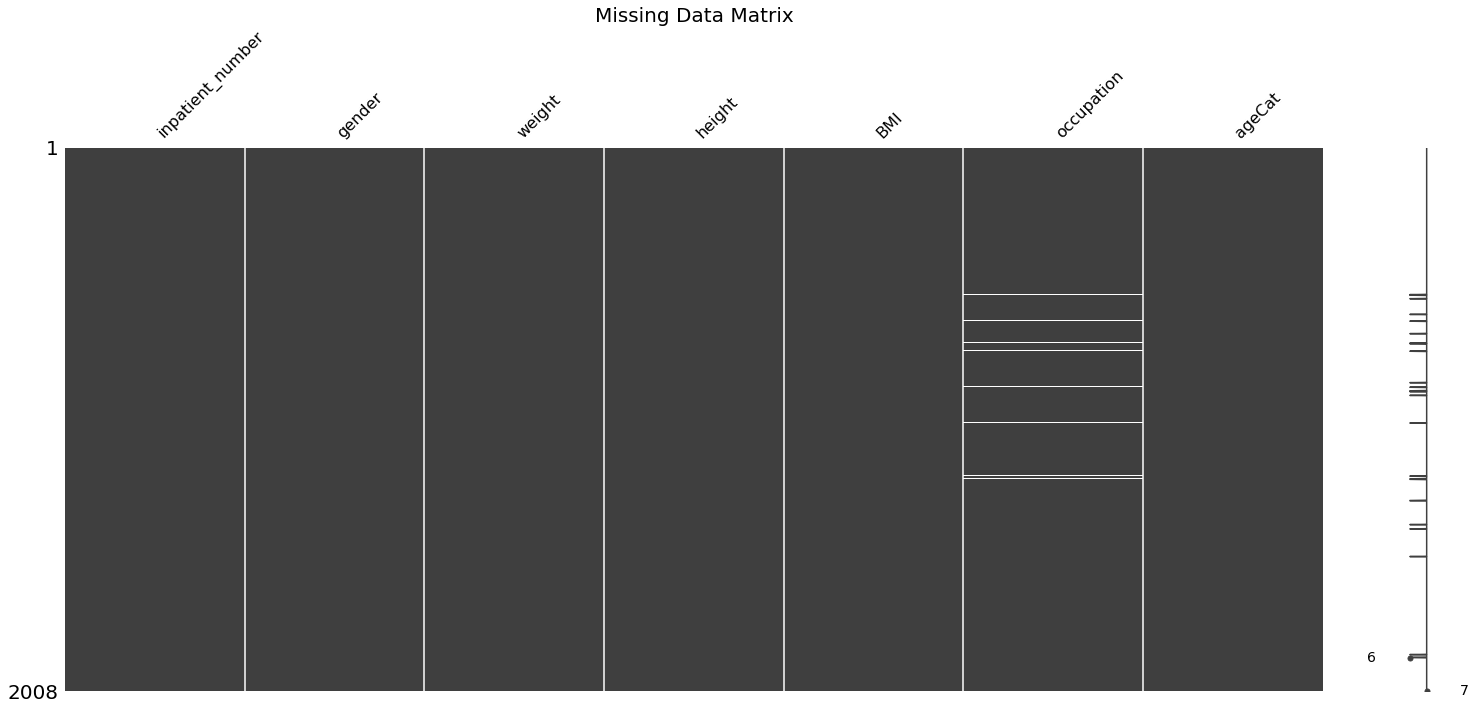

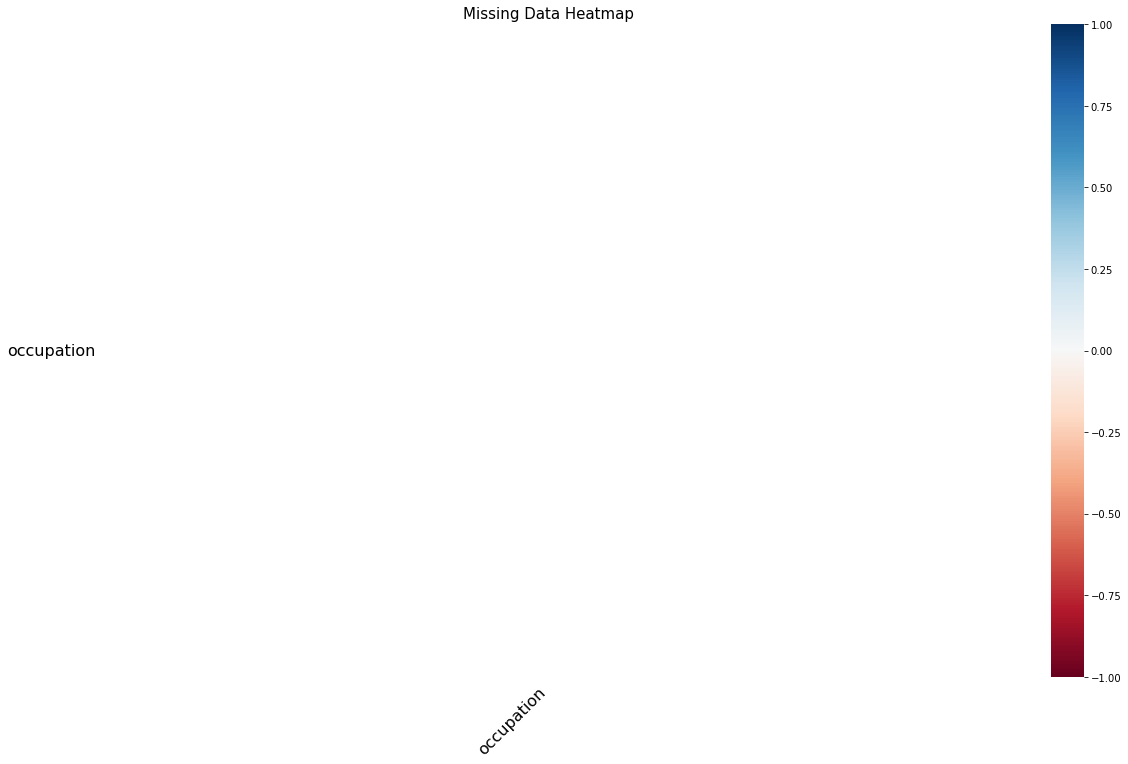

In [34]:
#Using missingno library to visualise the missing data

import missingno as msno 
df1.info()  

msno.matrix(df1)   #missing data matrix
plt.title('Missing Data Matrix',fontsize=20)   #Shows that only occcupation has missing values


msno.heatmap(df1)  #using heatmap to visualise the data
plt.title('Missing Data Heatmap',fontsize = 15)

print(df1.isnull().sum())


### Q8.Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?


C:\Users\apoor\AppData\Local\Temp/ipykernel_27060/796038169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_death']= Hospitalization_Discharge['death_within_28_days']+Hospitalization_Discharge['death_within_3_months']+Hospitalization_Discharge['death_within_6_months']


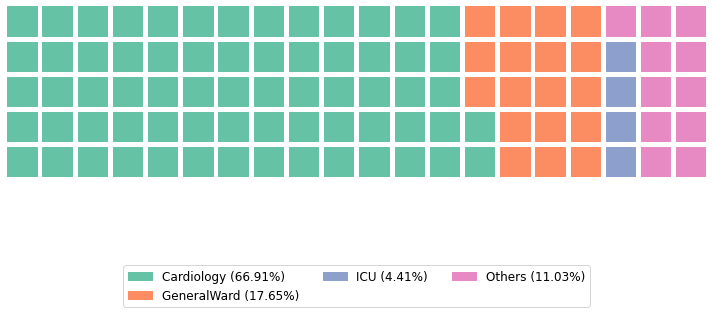

In [35]:
!pip install pywaffle matplotlib
from pywaffle import Waffle

#subsetting the data to required columns
df= Hospitalization_Discharge[['admission_ward','death_within_28_days','death_within_3_months','death_within_6_months']]
df.head()

#calculating total death by adding independent death columns
df['total_death']= Hospitalization_Discharge['death_within_28_days']+Hospitalization_Discharge['death_within_3_months']+Hospitalization_Discharge['death_within_6_months']
df.groupby (['admission_ward','total_death']).size()

#aggregating total death by admission_ward categories
df_group= df.groupby(['admission_ward']).agg('sum').reset_index()
df_group.drop(columns=['death_within_28_days','death_within_3_months','death_within_6_months'], axis=1, inplace=True)

df_group.head()

#calculating percentage of total death
df_group['percentage']=df_group['total_death'].apply(lambda x:(x/df_group['total_death'].sum())*100)
df_group['percentage']= round(df_group['percentage'],2)
df_group

#creating plot labels
plot_labels = [f'{i} ({str(j)}%)' for i,j in zip (df_group.admission_ward,df_group.percentage)]
plot_labels

# Creating a waffle chart
plt.figure(FigureClass=Waffle,figsize=(10,10),rows=5, columns =20,
           values= df_group['percentage'],
           labels=plot_labels,
           legend={'loc':'lower center','bbox_to_anchor':(0.5,-0.8),'ncol':3, 'fontsize':12})
plt.show()

### Q9.Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [16]:
# Example of a program to multiply two matrices using list comprehension

# Consider a 3x3 matrix
A = [[12, 2, 10],
    [27, 8, 6],
    [16, 11, 1]]
 
# Conisder a 3x4 matrix
B = [[6, 3, 7, 0],
    [3, 3, 3, 5],
    [2, 3, 17, 13]]

# The result is a 3x4 matrix
result = [[sum(a1 * b1 for a1, b1 in zip(A_row, B_col)) 
                        for B_col in zip(*B)]
                                for A_row in A]
 
for i in result:
    print('The result is:',i)
 

The result is: [98, 72, 260, 140]
The result is: [198, 123, 315, 118]
The result is: [131, 84, 162, 68]


### Q10.Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph¶

<class 'pandas.core.series.Series'>


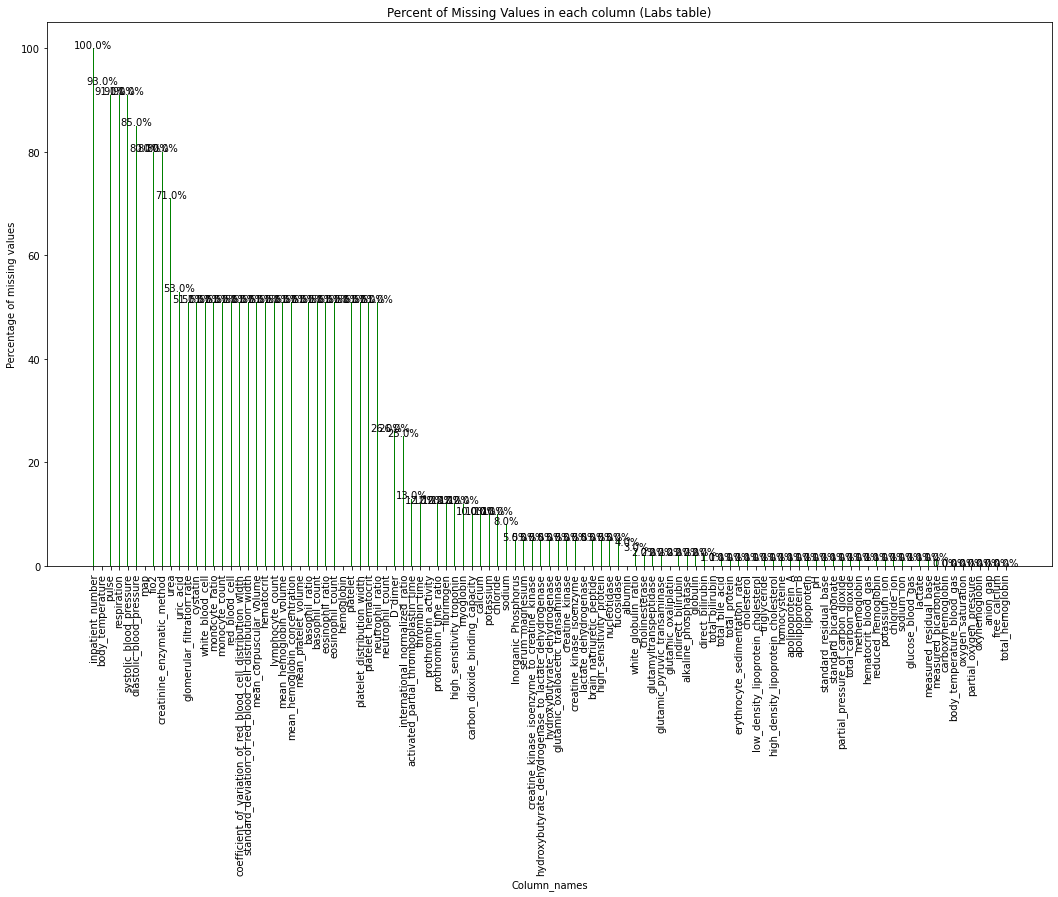

In [44]:
#Calculating the missing values of each column in Labs and converting to percentage
#Since the number of columns in the lab dataset are more than 100, the names of each column are getting overlapped

percent_missing_values = Labs.isnull().mean().round(2)* 100
print(type(percent_missing_values))

# Sorting the missing values in descending order
sorting_missing_values = percent_missing_values.sort_values(ascending=False)

#Defining the x and y lables for the bar graph
x= Labs.columns
y = sorting_missing_values
width = 0.1              # Keeping the width size to a min value to show all the columns clearly
fig, ax = plt.subplots(figsize=(18, 10))

plt.xlabel('Column_names')
plt.xticks(range(len(x)), x, rotation='vertical')   # Showing the column names vertically
plt.ylabel('Percentage of missing values')
plt.title('Percent of Missing Values in each column (Labs table)')
styling = ax.bar(x, y, width, align='center',color='green')

# For calculating the percentage for each column 
for i in styling:
    height = i.get_height()
    ax.text(x=i.get_x() + i.get_width() / 2, y=height+0.050,  #setting the height and width of each column
      s="{}%".format(height),
      ha='center')

plt.show()

### Q11.A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.{2,9587456281,1252478965,7397260044}¶

In [45]:
str_list=['2','9587456281','1252478965','7397260044']
for s in str_list:
    if len(s)==10 and s[0] in ['7','8','9']:
         print("YES")
    else:
         print("NO")  

NO
YES
NO
YES


### Q12.If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [48]:

normal_min = 3.5
normal_max = 5.6

patients_outside_normal_range=CardiacComplications.loc[(CardiacComplications['left_ventricular_end_diastolic_diameter_LV'] < normal_min) | (CardiacComplications['left_ventricular_end_diastolic_diameter_LV'] > normal_max)]
print('Number of patients outside the normal range :',patients_outside_normal_range.shape[0])
patients_outside_normal_range

#subset the data to the required columns
df_cardiac=patients_outside_normal_range[['inpatient_number','left_ventricular_end_diastolic_diameter_LV']]
df_cardiac.shape

#extract the required cols from Labs
df_labs= Labs[['inpatient_number','map']]
df_labs

#merge the two datasets on inpatient column
df_merge= pd.merge(df_cardiac,df_labs, on=['inpatient_number'], how='inner')
df_merge

#dropping ventricular column
df_merge.drop(columns=['left_ventricular_end_diastolic_diameter_LV'], axis=1, inplace=True)
df_merge.head()

#rounding map column
df_merge['map']=round(df_merge['map'],0)
df_merge

#map of most patients
map_count =df_merge['map'].value_counts().reset_index()
map_count

max(map_count['map'])

print(f'The Map of most patients with the left ventricular end diastolic diameter in the normal range is 97 with a maximum occurrence of {map_count["map"].iloc[0]}')




Number of patients outside the normal range : 1311
The Map of most patients with the left ventricular end diastolic diameter in the normal range is 97 with a maximum occurrence of 74


### Q13.Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

In [53]:
#Defining a function to classify temperature
def temperature_range(temp):
    if temp < 35.0:
        return 'Hypothermia'
    elif temp<=37.5:
        return 'Within the range'
    else:
        return 'Hyperthermia'
    

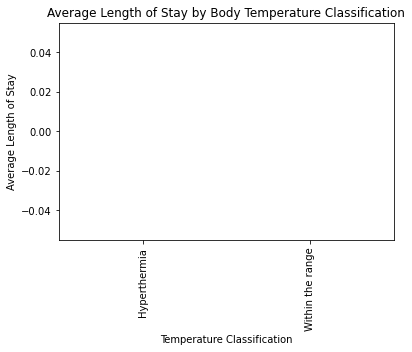

In [54]:
#Creating a new column to store the different temperature ranges

Labs['classify_temperature'] = Labs['body_temperature'].apply(temperature_range)
Labs['classify_temperature']

#Concatenating 2 different sheets
merge_df=pd.concat([Hospitalization_Discharge, Labs], ignore_index=True)
merge_df

#Calculating the length of stay
length_of_stay = merge_df.groupby('classify_temperature')['dischargeDay'].mean()
length_of_stay
length_of_stay.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Temperature Classification')
plt.ylabel('Average Length of Stay')
plt.title('Average Length of Stay by Body Temperature Classification')
plt.show()

### Q14.Find the list of patients whose DischargeDay is greater than the value given by the user

In [57]:
num=int(input("Enter Any Number"))
Result=num<Hospitalization_Discharge['dischargeDay']
print(Hospitalization_Discharge.loc[Result,['inpatient_number','dischargeDay']])

Enter Any Number5
      inpatient_number  dischargeDay
0             857781.0          11.0
1             743087.0           8.0
3             775928.0          11.0
5             823318.0           6.0
6             844094.0          10.0
...                ...           ...
2001          726701.0          10.0
2002          754589.0           8.0
2004          734280.0           8.0
2005          781004.0          14.0
2007          791864.0           6.0

[1580 rows x 2 columns]


### Q15.Display a pie chart of number of patients in each category listed -death_within_28_days re_admission_within_28_days -death_within_3_months -re_admission_within_3_months -death_within_6_months -re_admission_within_6_months -return_to_emergency_department_within_6_months

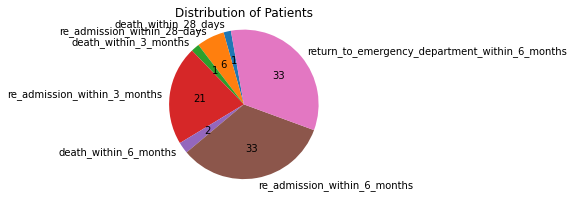

In [58]:
df_test=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=0)
data_test=df_test[["death_within_28_days", "re_admission_within_28_days", "death_within_3_months","re_admission_within_3_months","death_within_6_months",
                   "re_admission_within_6_months","return_to_emergency_department_within_6_months"]]
data_test.groupby(["death_within_28_days", "re_admission_within_28_days", "death_within_3_months","re_admission_within_3_months","death_within_6_months",
                   "re_admission_within_6_months","return_to_emergency_department_within_6_months"])
#display(data_test)
plt.figure(figsize=(3, 3))

counts = data_test.sum()

# Convert counts to strings for labels
labels = [str(label) for label in counts.index]

plt.pie(counts, labels=labels, startangle=100, autopct='%d')
plt.title("Distribution of Patients")
plt.axis('equal')  
plt.show()

### Q16.Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [59]:
merge_df = pd.merge(CardiacComplications, Labs, on=['inpatient_number'])
merge_df = pd.merge(merge_df, Demography, on=['inpatient_number'])
pivot_df = pd.melt(merge_df, id_vars=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                   value_vars=['uric_acid', 'BMI'], var_name='Metric', value_name='Value')

pivot_table = pivot_df.pivot_table(index=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                                 columns='Metric',values='Value', aggfunc='mean')  
pivot_table

Metric                                                                            BMI  \
myocardial_infarction congestive_heart_failure peripheral_vascular_disease              
0.0                   0.0                      0.0                          21.688675   
                      1.0                      0.0                          21.761582   
                                               1.0                          22.724937   
1.0                   0.0                      0.0                          20.049487   
                      1.0                      0.0                          21.661325   
                                               1.0                          22.845834   

Metric                                                                       uric_acid  
myocardial_infarction congestive_heart_failure peripheral_vascular_disease              
0.0                   0.0                      0.0                          485.539683  
                      1.0                      0.0                          480.717178  
                                               1.0                          482.539326  
1.0                   0.0                      0.0                          565.900000  
                      1.0                      0.0                          499.558333  
                                               1.0                          549.300000